# K-NearestNeighbor (KNN)

## How is KNN work?
** find the most similarity examples in dataset, and then predict the unknown example. **

<img src="KNN/4.png" style="width:600px;height:330px;float:left">

** Here, the mean value of the top 3 similar examples' price **
<img src="KNN/5.png" style="width:600px;height:330px;float:left">

**similarity distance define**

q1-qn / p1-pn is the features in example q and p resperetely
<img src="KNN/6.png" style="width:400px;height:80px;float:left">


## Use KNN for Rent Price in Airbnb

<img src="KNN/1.png" style="width:800px;height:480px;float:left">

In [8]:
import pandas as pd

## read file
dc_listings = pd.read_csv('KNN/listings.csv')
## the data columns 
dc_listings.columns
## selected columns
features = ['accommodates','bedrooms','bathrooms','beds','price','minimum_nights','maximum_nights','number_of_reviews']
## keep the selected columns
dc_listings_s = dc_listings[features]
## the shape of data(row, colmuns)
print(dc_listings_s.shape)
## head of data
dc_listings_s.head()

(3723, 8)


,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,4,1.0,1.0,2.0,$160.00,1,1125,0
1,6,3.0,3.0,3.0,$350.00,2,30,65
2,1,1.0,2.0,1.0,$50.00,2,1125,1
3,2,1.0,1.0,1.0,$95.00,1,1125,0
4,4,1.0,1.0,1.0,$50.00,7,1125,0


### 1.the price for three bedroom ?

H:\python\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


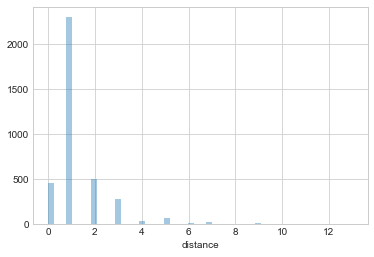

In [9]:
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

## three bedroom
our_acc = 3
## the bedroom distance difference from the database
dc_listings_s['distance'] = np.abs(dc_listings_s.accommodates - our_acc)
## summary the distance
dc_listings_s.distance.value_counts().sort_index()
## seaborn plot
sns.distplot(dc_listings_s.distance, kde = False)

In [10]:
## re-shample
## frac: the precent of select num
## random_state: set random seed
dc_listings_ss = dc_listings_s.sample(frac = 1,random_state=0)
dc_listings_ss.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,distance
2645,3,1.0,1.0,1.0,$75.00,7,180,24,0
1503,7,2.0,2.0,3.0,$100.00,1,1125,1,4
1791,3,1.0,1.0,1.0,$95.00,2,1125,16,0
3539,5,3.0,2.5,3.0,$265.00,2,7,0,2
489,2,1.0,1.0,1.0,$111.00,1,1125,6,1


In [11]:
## sort by value
dc_listings_sss = dc_listings_ss.sort_values('distance')
dc_listings_sss.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,distance
2645,3,1.0,1.0,1.0,$75.00,7,180,24,0
2825,3,3.0,2.0,2.0,$120.00,1,1125,0,0
2145,3,1.0,2.0,2.0,$90.00,1,1125,55,0
2541,3,1.0,1.0,1.0,$50.00,1,1125,1,0
3349,3,1.0,1.0,1.0,$105.00,1,1125,7,0


In [12]:
## transfer the price type from object to float
dc_listings_sss['price'] = dc_listings_sss.price.str.replace("\$|,",'').astype(float)

dc_listings_sss.price.head()

2645     75.0
2825    120.0
2145     90.0
2541     50.0
3349    105.0
Name: price, dtype: float64

In [13]:
## get the price for three bedroom

## the mean of the most close five prive
dc_listings_sss.price.iloc[:5].mean()


88.0

### KNN Model traning & test
<img src="KNN/7.png" style="width:600px;height:250px;float:left">

In [8]:
## remove the distance column
dc_listings_sss.drop('distance', axis = 1)

train_df = dc_listings_sss.copy().iloc[:2792]
test_df  = dc_listings_sss.copy().iloc[2792:]

In [9]:
def predict_price(our_acc,feature_column):
    tem_df = train_df
    tem_df['distance'] = np.abs(tem_df[feature_column] - our_acc)
    tem_df = tem_df.sort_values('distance')
    knn_top5 = tem_df.price.iloc[:5]
    predict = knn_top5.mean()
    return(predict)

In [10]:
## calculate the predict value in test data
test_df['predicted_price'] = test_df.accommodates.apply(predict_price,feature_column = 'accommodates')
test_df.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,distance,predicted_price
2850,1,1.0,1.0,1.0,40.0,2,1125,105,2,83.6
2279,1,1.0,1.0,1.0,45.0,1,1125,8,2,83.6
2771,5,2.0,2.0,3.0,217.0,3,730,19,2,340.4
910,5,2.0,2.0,3.0,415.0,1,1125,1,2,340.4
2434,5,1.0,1.0,3.0,275.0,3,1125,9,2,340.4


### Evaluate the KNN model
<img src="KNN/8.png" style="width:700px;height:100px;float:left">

In [11]:
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**2
rmse = test_df['squared_error'].mean()**(1/2)
rmse

212.98927967051543

In [12]:
for feature in ['accommodates','bedrooms','bathrooms','number_of_reviews']:
    test_df['predicted_price'] = test_df[feature].apply(predict_price,feature_column=feature)
    test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
    mse = test_df['squared_error'].mean()
    rmse = mse ** (1/2)
    print("RMSE for the {} column: {}".format(feature,rmse))

RMSE for the accommodates column: 212.98927967051543
RMSE for the bedrooms column: 199.80935328065033
RMSE for the bathrooms column: 230.24716705684227
RMSE for the number_of_reviews column: 235.91327066995507


### The single variants give different RMSE, combine all variants

### Normalize, remove the sclae difference in variants：Each variants contribute equally

####  Z-score normalization
Transfer dataset into μ=0,  σ = 1
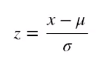

#### 0-1 normalization
Transfer all value into 0-1 range
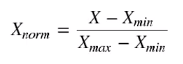

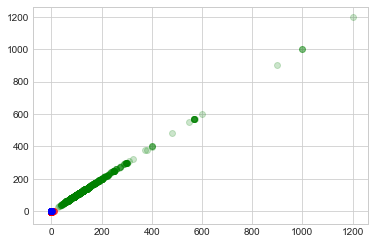

In [108]:
## https://scikit-learn.org/stable/index.html
## tutorials; API; example

from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns

scale_db = dc_listings_sss[['price','bedrooms']].iloc[:1000]
scale_db['bedrooms'] = scale_db['bedrooms'].fillna(scale_db['bedrooms'].mean())

## z-socre
scale_std = preprocessing.StandardScaler().fit(scale_db)
p_std = scale_std.transform(scale_db)

# ## MinMax
scale_mm = preprocessing.MinMaxScaler().fit(scale_db)
p_mm =  scale_mm.transform(scale_db)

scale_db.head()
# ## visulization
plt.figure()

plt.scatter(scale_db['price'], scale_db['price'], 
           color = 'green', label = 'Input scale', alpha = 0.2)

plt.scatter(p_std[:,0], p_std[:,1], 
           color = 'red', label = 'Z-Socre', alpha = 0.2)

plt.scatter(p_mm[:,0], p_mm[:,1], 
           color = 'blue', label = 'Min-Max', alpha = 0.2)




Z-score, MinMax, Input

**The inner architecture not change**
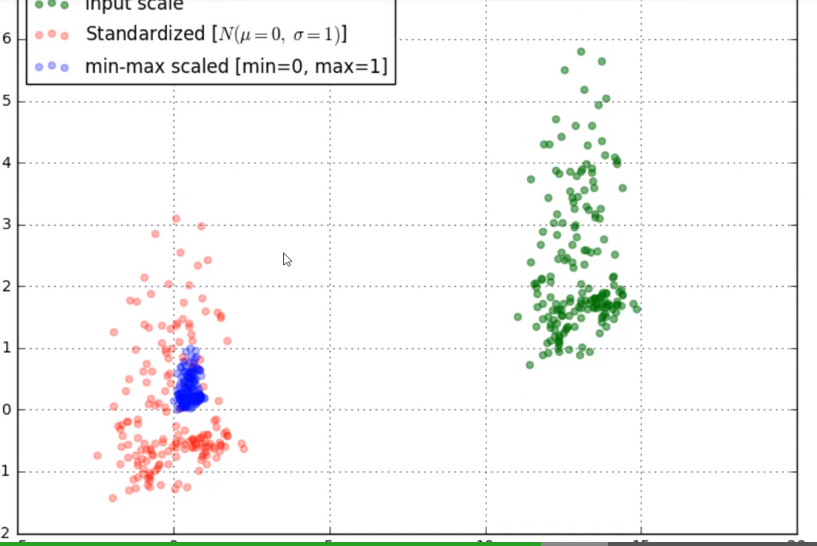

## Integrate all features tegother

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

## read file
dc_listings = pd.read_csv('KNN/listings.csv')
## all features
features = ['accommodates','bedrooms','bathrooms','beds','price','minimum_nights','maximum_nights','number_of_reviews']
## extract features
dc_listings = dc_listings[features]
## replace special character($) 
dc_listings['price'] = dc_listings.price.str.replace('\$|,','').astype(float)
## drop any row with NA
dc_listings = dc_listings.dropna()
## z-score normalize
dc_listings[features] = StandardScaler().fit_transform(dc_listings[features])
## done
dc_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,0.401420,-0.249501,-0.439211,0.297386,0.081119,-0.341421,-0.016575,-0.516779
1,1.399466,2.129508,2.969551,1.141704,1.462622,-0.065047,-0.016606,1.706767
2,-1.095648,-0.249501,1.265170,-0.546933,-0.718699,-0.065047,-0.016575,-0.482571
3,-0.596625,-0.249501,-0.439211,-0.546933,-0.391501,-0.341421,-0.016575,-0.516779
4,0.401420,-0.249501,-0.439211,-0.546933,-0.718699,1.316824,-0.016575,-0.516779


In [43]:
## train & test subgroup
normal_dc = dc_listings
print(normal_dc.shape)
norm_train_df = normal_dc.copy().iloc[:2792]
norm_test_df = normal_dc.copy().iloc[2792:]

(3671, 8)


### Mulitple variant for KNN
<img src="KNN/9.png" style="width:700px;height:400px;float:left">

In [55]:
from scipy.spatial import distance

def predict_price_multiplevariate(test_list,feature_cols):
    ## define a temp data
    train_list = norm_train_df
    ## calculate the euclidean distance of multivariants 
    train_list['distance'] = distance.cdist(train_list[feature_cols],[test_list[feature_cols]])
    ## find the top close 5 price
    train_list = train_list.sort_values('distance')
    knn_5 = train_list.price.iloc[:5]
    ## the mean value of the top 5
    predict_price = knn_5.mean()
    return(predict_price)

## got multivariants
cols = ['accommodates', 'bathrooms','beds', 'minimum_nights']
## calcuate all features eulidean distance for each row (axis =1)
norm_test_df['predict_price'] = norm_test_df[cols].apply(predict_price_multiplevariate,feature_cols= cols,axis = 1)
## got the squre_error from predict and ture price
norm_test_df['s_error'] = (norm_test_df['predict_price'] - norm_test_df['price'])**2
## got the rmse
mse = norm_test_df['s_error'].mean()
rmse = mse **(1/2)

rmse


0.866826092264811

## Use Sklear to KNN
### the detail
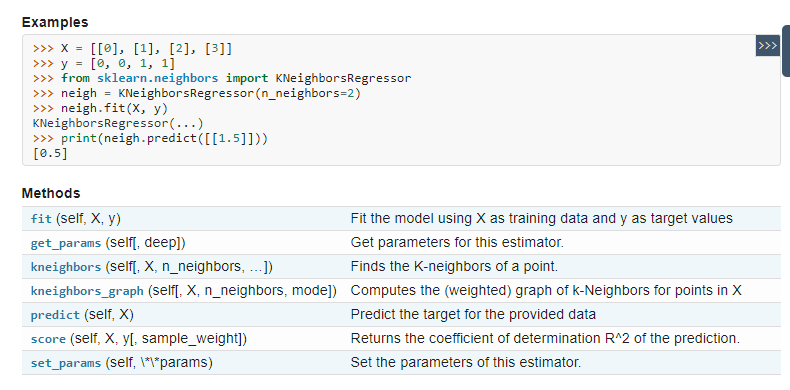
### how to use(examples)
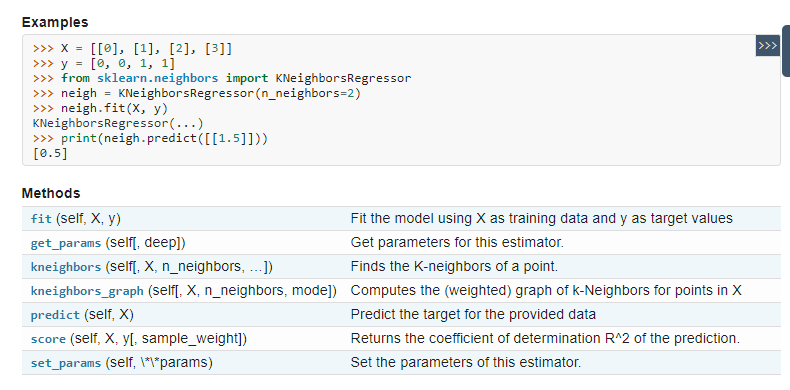

In [60]:
from sklearn.neighbors import KNeighborsRegressor

## features
cols = ['accommodates', 'bathrooms','beds', 'minimum_nights']
## rename
knn = KNeighborsRegressor()
## training
knn.fit(norm_train_df[cols], norm_train_df['price'])
## testing
predict_price = knn.predict(norm_test_df[cols])

from sklearn.metrics import mean_squared_error

## the mse of predict and ture price
predict_price = mean_squared_error(norm_test_df['price'], predict_price )
## rmse
rmse =  predict_price ** 1/2
rmse

0.3713862645329121